In [1]:
# The ultimate target feature: time from one stop to another

# Imports
import pandas as pd
import numpy as np
from datetime import date, datetime
from patsy import dmatrices
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import export_graphviz, DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.tree import export_graphviz 
from sklearn import tree
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
from statsmodels.formula.api import ols

# Read csv file into a dataframe.
df = pd.read_csv('csv_data/bus_route4_clean.csv')

# 1.0 Model Analysis

## 1.1 Random Forest Regression

In [2]:
#journey pattern ID here just represents direction - we can switch for direction for user input
#took out RDS event as not right to simply include one event - not consist for all events at RDS in Jan
#stop order is essentially the number of times that bus stopped - we will not know that
#speed - uses the stop order to work out time travelling (includes time journey started) / stop order (position) - we will not know that
#therefore is the best we can do in real time is to record the journey times/distances as speeds for each scheduled run?
y, X = dmatrices('journey_time ~  speed  + stop_order + DayOfWeek + HourOfDay + MinsOfHour + Direction_north', df, return_type="dataframe") 
y = np.ravel(y)
X

,Intercept,speed,stop_order,DayOfWeek,HourOfDay,MinsOfHour,Direction_north
0,1.0,1.965385e+08,13.0,1.0,9.0,17.0,0.0
1,1.0,1.235217e+08,23.0,1.0,12.0,54.0,0.0
2,1.0,1.405000e+08,24.0,1.0,13.0,2.0,0.0
3,1.0,1.564545e+08,22.0,1.0,20.0,28.0,1.0
4,1.0,2.330000e+08,11.0,1.0,20.0,44.0,0.0
5,1.0,2.490000e+08,12.0,1.0,20.0,51.0,0.0
6,1.0,1.703333e+08,15.0,2.0,7.0,15.0,1.0
7,1.0,1.410526e+08,19.0,2.0,7.0,23.0,0.0
8,1.0,1.427500e+08,20.0,2.0,7.0,26.0,0.0
9,1.0,1.130769e+08,26.0,2.0,7.0,35.0,1.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=33) 

In [4]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [5]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=10))

In [6]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [7]:
clf = GridSearchCV(pipeline, hyperparameters, cv=8)

In [8]:
clf.fit(X_train, y_train)

GridSearchCV(cv=8, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 5, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [9]:
pred = clf.predict(X_test)

In [10]:
r2_score(y_test, pred)

0.89635650694537361

Good, closer to 1 the better

In [11]:
mean_squared_error(y_test, pred)

10.500351437699681

Good, closer to 0 the better.

This saves the model for later.

In [12]:
joblib.dump(clf, '../flask_app/static/rf_regressor.pkl')

['../flask_app/static/rf_regressor.pkl']

In [13]:
X_test.head()

,Intercept,speed,stop_order,DayOfWeek,HourOfDay,MinsOfHour,Direction_north
788,1.0,1.324857e+08,35.0,1.0,10.0,10.0,0.0
151,1.0,1.144333e+08,30.0,3.0,19.0,2.0,0.0
1385,1.0,1.102647e+08,34.0,0.0,8.0,18.0,1.0
1027,1.0,1.903529e+08,17.0,5.0,13.0,24.0,1.0
1088,1.0,1.251250e+08,32.0,0.0,12.0,26.0,0.0


This can then be reloaded to be used in the flask app. As seen below.

In [14]:
clf2 = joblib.load('../flask_app/static/rf_regressor.pkl')

In [15]:
clf2.predict(X_test)

array([ 77.6,  60.9,  67. ,  52.7,  66.6,  62.1,  76.9,  74.9,  67.6,
        73.8,  66.3,  83. ,  78.6,  69.7,  61. ,  75. ,  53.6,  75.2,
        70.7,  50.3,  69.4,  59.9,  56.3,  53.4,  67.1,  61. ,  59.5,
        55.9,  62.8,  57.3,  51.3,  48.2,  67.5,  63.4,  76.1,  64.3,
        81.8,  50.6,  61.2,  67.1,  75.8,  57.6,  60.1,  69.1,  55.7,
        59.9,  81.7,  59.1,  78.8,  64.8,  54.7,  55.7,  62.4,  77.5,
        84. ,  58.3,  57.4,  58.6,  66. ,  56. ,  61.3,  58.2,  76.3,
        57.3,  59. ,  59.6,  64.7,  60.4,  49.8,  68.5,  58.2,  44.7,
        61.8,  58.6,  59.6,  72.4,  86.2,  62.6,  64.4,  45.3,  75.6,
        58.7,  54.7,  79.3,  58.8,  69.8,  77.6,  65.8,  46.4,  76.2,
        66.2,  77.2,  71.9,  48.2,  60.2,  60.4,  59.1,  66.6,  43.6,
        71.5,  60.7,  50.9,  68.3,  79.3,  63.3,  62.9,  62.8,  61.2,
        60.3,  60.2,  60.4,  59.5,  57.3,  59.5,  50.1,  73.6,  56.8,
        66.8,  64.5,  50.3,  64.9,  46.9,  70.8,  52.5,  62. ,  63.4,
        66.6,  46.8,

In [16]:
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)

In [17]:
df.shape

(1561, 42)

## To Do

Date is in the model as a variable making significant impact as cannot group random forest by dates - to confirm why it makes an impact (improves score about 7% but we should  understand is this equiv to groupby or coincidence or a proxy for events).

Getting a memory error with feature importance so for now using the linear results to guide - issue with rain: clearly important - we know that - and humidity is important, but no rain columns are making any impact. See commented out code below.

In [18]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [19]:
pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})

,feature,importance
0,Intercept,0.000000
1,speed,0.250122
2,stop_order,0.194020
3,DayOfWeek,0.130881
4,HourOfDay,0.168424
5,MinsOfHour,0.216063
6,Direction_north,0.040489


# Decision tree for single tree - not going to work here but gives visual of the tree structure

In [20]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=5)
clf = clf.fit(X_train,y_train)

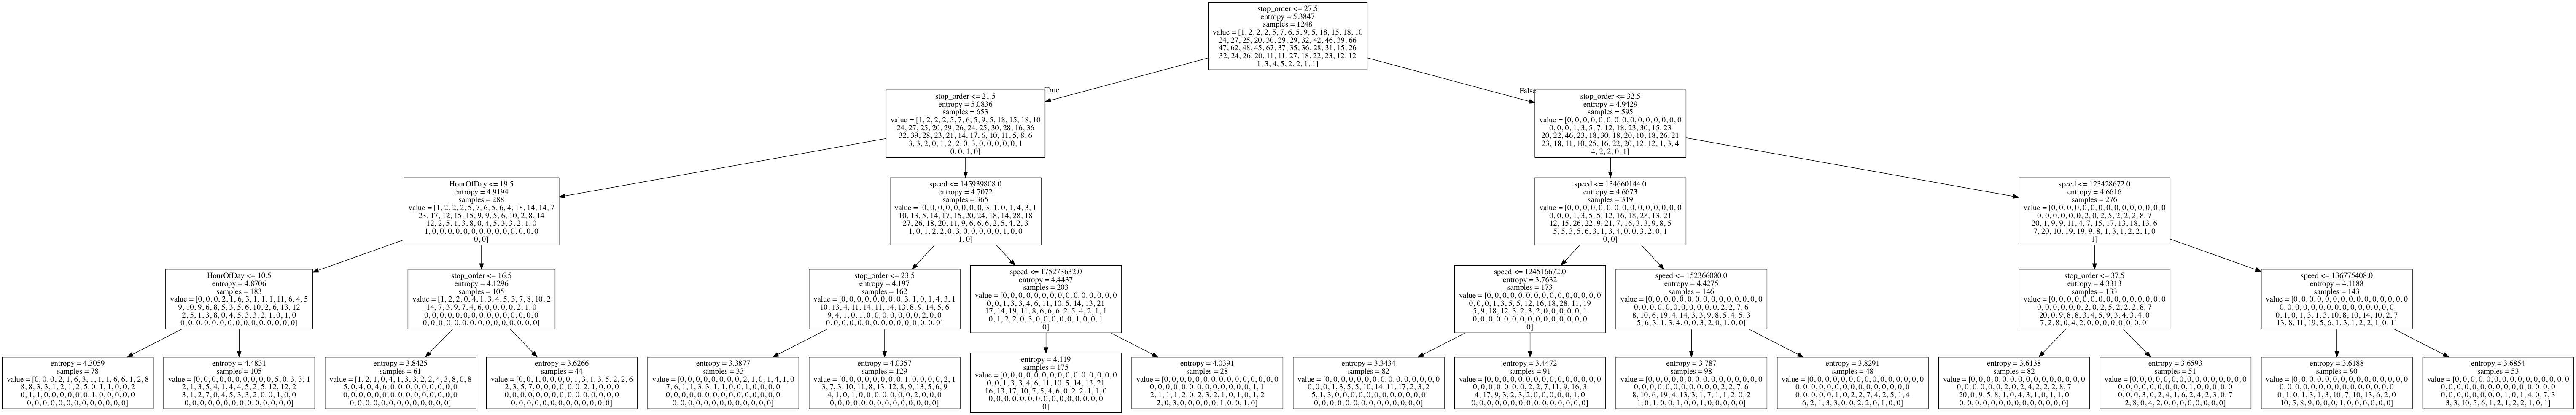

In [21]:
tree.export_graphviz(clf, out_file='tree.dot', feature_names = X_train.columns)
!dot -Tpng tree.dot > tree.png
from IPython.display import Image 
Image(filename='tree.png')

In [63]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True,show_classification_report=True, show_confussion_matrix=True):
    
    y_pred=clf.predict(X)
    
    if show_accuracy:
        print ("accuracy",metrics.accuracy_score(y, y_pred))
        
    if show_classification_report:
        print ("classification",metrics.classification_report(y,y_pred))
            
    if show_confussion_matrix:
        print ("confusion matrix",metrics.confusion_matrix(y,y_pred))
        
measure_performance(X_train,y_train,clf)

accuracy 0.152243589744
classification              precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         1
       36.0       0.00      0.00      0.00         2
       39.0       0.00      0.00      0.00         2
       40.0       0.00      0.00      0.00         2
       41.0       0.00      0.00      0.00         5
       42.0       0.00      0.00      0.00         7
       43.0       0.00      0.00      0.00         6
       44.0       0.00      0.00      0.00         5
       45.0       0.00      0.00      0.00         9
       46.0       0.00      0.00      0.00         5
       47.0       0.00      0.00      0.00        18
       48.0       0.00      0.00      0.00        15
       49.0       0.13      0.44      0.20        18
       50.0       0.00      0.00      0.00        10
       51.0       0.10      0.33      0.16        24
       52.0       0.21      0.26      0.23        27
       53.0       0.00      0.00      0.00        25
      

/Users/user/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# K nearest neighbours

In [23]:
import random
import math
from numpy.random import permutation

# Randomly shuffle the index of df.
random_indices = permutation(df.index)
# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(df)/3)
# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = df.loc[random_indices[1:test_cutoff]]
# Generate the train set with the rest of the data.
train = df.loc[random_indices[test_cutoff:]]

In [24]:
x_columns = ['speed', 'stop_order','DayOfWeek', 'HourOfDay', 'MinsOfHour', 'Direction_north']
y_column = ['time_bins']

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data.
knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])


In [25]:
# Get the actual values for the test set.
actual = test[y_column]

# Compute the mean squared error of our predictions.
mse = (((predictions - actual) ** 2).sum()) / len(predictions)


In [26]:
mse

time_bins    1.302736
dtype: float64

# Linear model

In [57]:
import statsmodels.formula.api as sm

# Train all continuous features.
check1 = sm.ols(formula="journey_time ~  speed  + stop_order", data=df).fit()
# Print the weights learned for each feature.
print(check1.summary())

                            OLS Regression Results                            
Dep. Variable:           journey_time   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1246.
Date:                Fri, 30 Jun 2017   Prob (F-statistic):          4.94e-324
Time:                        13:10:21   Log-Likelihood:                -5170.7
No. Observations:                1561   AIC:                         1.035e+04
Df Residuals:                    1558   BIC:                         1.036e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.1089      1.182     13.631      0.0

# Logistic Regression Model with Bins

In [62]:
# Training the model with original selection of four features:
df['time_bins'] = df['time_bins'] / 10
logreg = sm.logit(formula='time_bins ~  speed  + stop_order + DayOfWeek + HourOfDay + MinsOfHour + Direction_north', data=df).fit()

# Print the weights learned for each feature.
print(logreg.params)

Optimization terminated successfully.
         Current function value: 0.000609
         Iterations 12
Intercept         -8.114988e+00
speed              9.625814e-10
stop_order         2.206150e-02
DayOfWeek         -2.183173e-03
HourOfDay         -1.747873e-03
MinsOfHour        -4.648245e-04
Direction_north    5.834817e-03
dtype: float64
